### <i> Rainfall Prediction Accuracy In The Us Using Advanced Machine Learning </i>
### <i> Import Library Files </i>

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [3]:
data = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")

In [4]:
data

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


### <i> Dataset Overview </i>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [7]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


### <i> Dataset Preprocessing </i>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Feature engineering: extract additional date features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

# Drop the original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Define features and target variable
X = data.drop('Rain Tomorrow', axis=1)  # Features
y = data['Rain Tomorrow']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns
categorical_cols = ['Location']  # Add any other categorical columns if needed
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Year', 'Month', 'Day', 'Weekday']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)

# Check the shapes of the processed data
print('Transformed training set shape:', X_train_transformed.shape)
print('Transformed testing set shape:', X_test_transformed.shape)


Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64
Transformed training set shape: (58480, 30)
Transformed testing set shape: (14620, 30)


### <i> Data Visulizations And EDA </i>

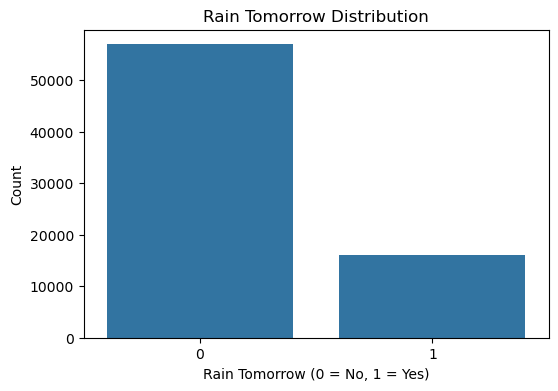

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 4. Rain Tomorrow Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Rain Tomorrow', data=data)
plt.title('Rain Tomorrow Distribution')
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

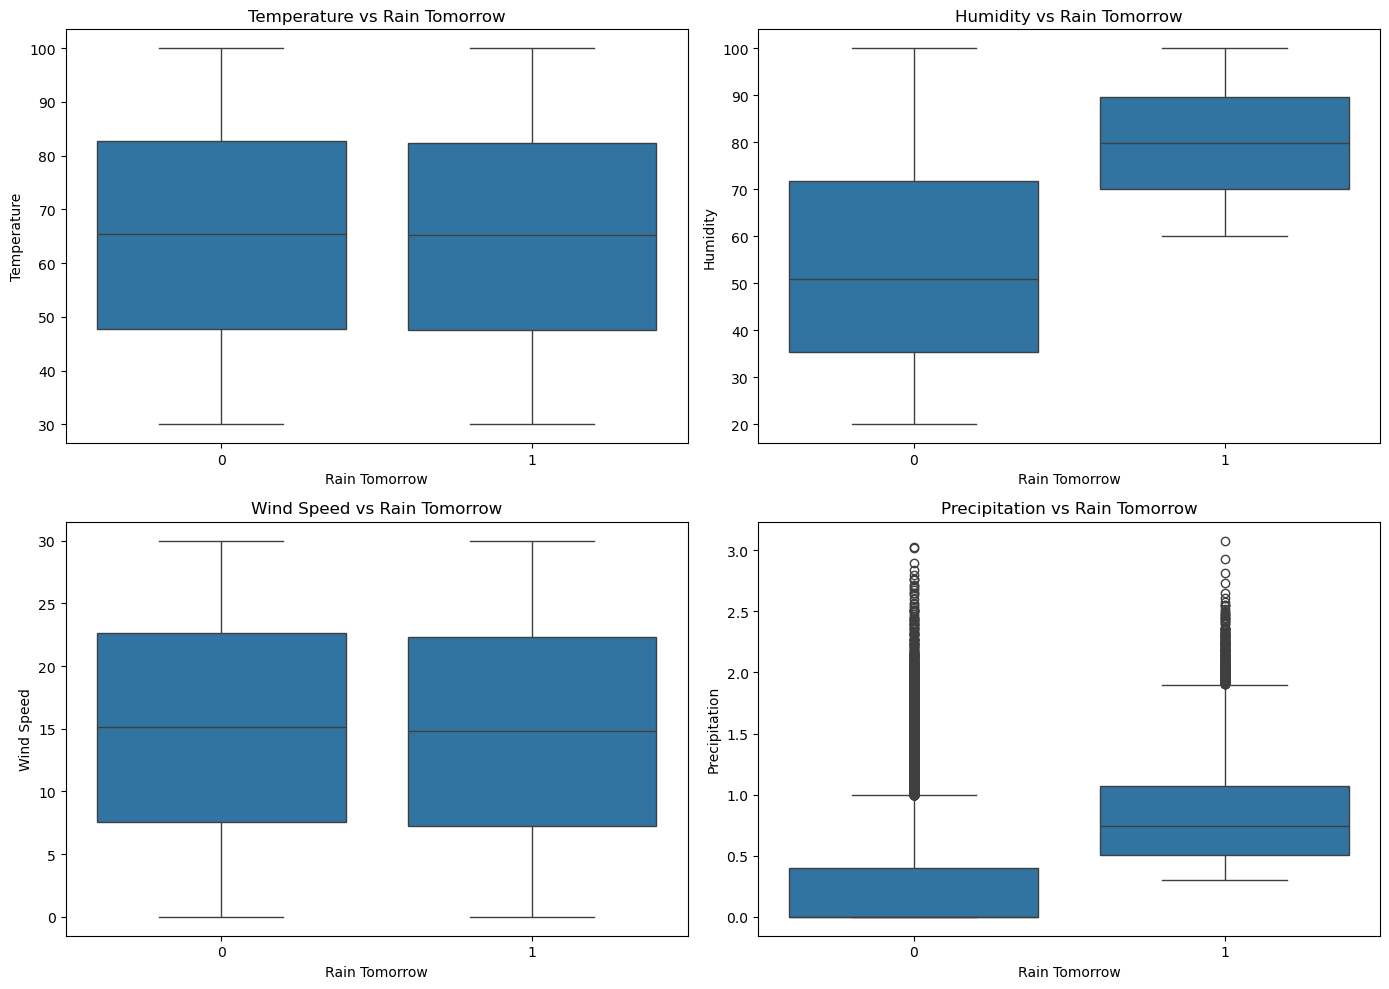

In [12]:
# 5. Boxplots of Features by Rain Tomorrow
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Rain Tomorrow', y='Temperature', data=data)
plt.title('Temperature vs Rain Tomorrow')

plt.subplot(2, 2, 2)
sns.boxplot(x='Rain Tomorrow', y='Humidity', data=data)
plt.title('Humidity vs Rain Tomorrow')

plt.subplot(2, 2, 3)
sns.boxplot(x='Rain Tomorrow', y='Wind Speed', data=data)
plt.title('Wind Speed vs Rain Tomorrow')

plt.subplot(2, 2, 4)
sns.boxplot(x='Rain Tomorrow', y='Precipitation', data=data)
plt.title('Precipitation vs Rain Tomorrow')

plt.tight_layout()
plt.show()

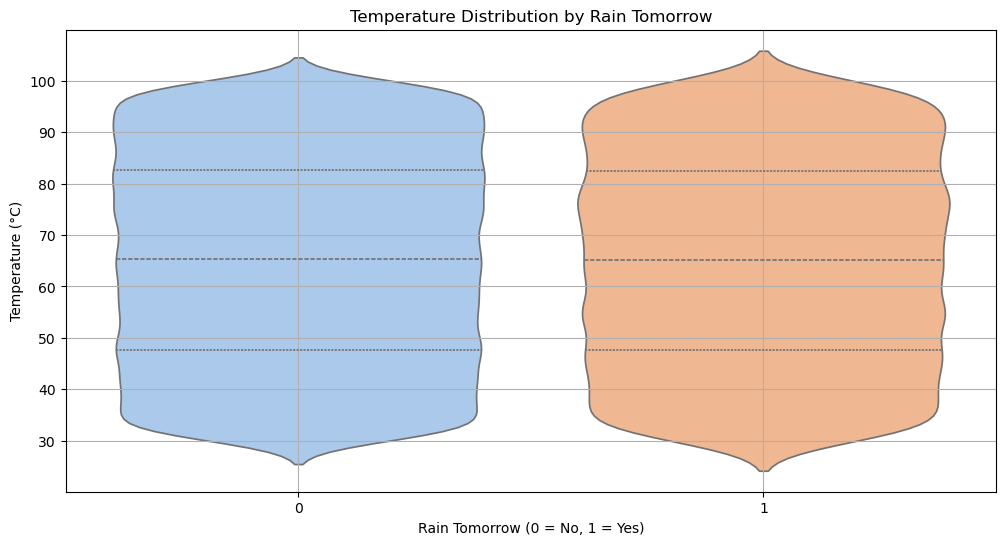

In [13]:
# 2. Violin Plot of Temperature and Humidity by Rain Tomorrow
plt.figure(figsize=(12, 6))
sns.violinplot(x='Rain Tomorrow', y='Temperature', data=data, inner='quartile', palette='pastel')
plt.title('Temperature Distribution by Rain Tomorrow')
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

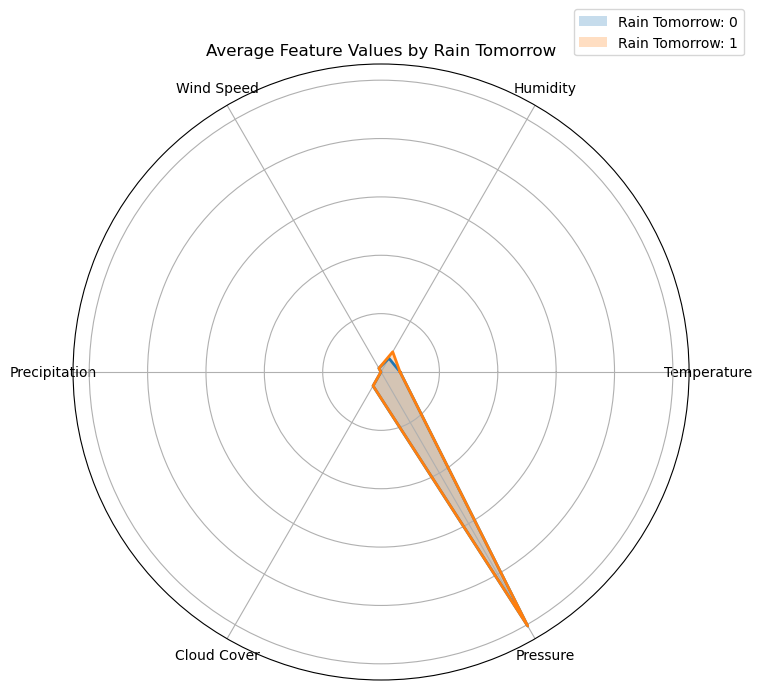

In [14]:
import numpy as np
# 3. Radar Chart for Average Feature Values by Rain Tomorrow
def radar_chart(data, feature_names):
    # Calculate average values for each feature based on 'Rain Tomorrow'
    average_values = data.groupby('Rain Tomorrow')[feature_names].mean().reset_index()
    num_vars = len(feature_names)

    # Create the radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i in range(len(average_values)):
        values = average_values.loc[i, feature_names].values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.fill(angles, values, alpha=0.25, label=f'Rain Tomorrow: {average_values.loc[i, "Rain Tomorrow"]}')
        ax.plot(angles, values, linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names)
    plt.title('Average Feature Values by Rain Tomorrow')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()


# Specify features for the radar chart
features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']
radar_chart(data, features)

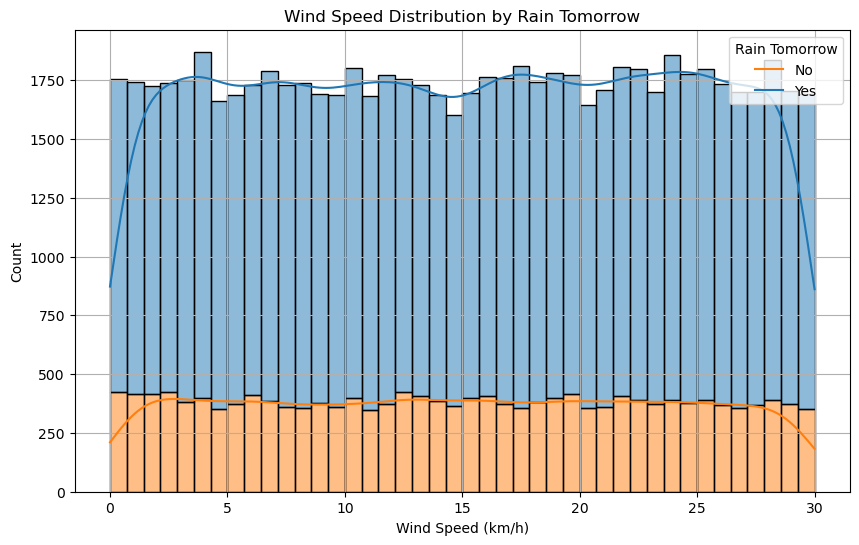

In [15]:
# 5. Count Plot of Rain Tomorrow by Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Wind Speed', hue='Rain Tomorrow', multiple='stack', kde=True)
plt.title('Wind Speed Distribution by Rain Tomorrow')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Count')
plt.legend(title='Rain Tomorrow', loc='upper right', labels=['No', 'Yes'])
plt.grid()
plt.show()

### <i> Modeling </i>

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Prepare the data
X = data.drop(columns=['Rain Tomorrow'])
y = data['Rain Tomorrow']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical variables
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns)  # Impute missing values for numerical features
    ]
)

# Fit and transform the feature set
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


### <i> Logistic Regression </i>

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Logistic Regression Model ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

print("Logistic Regression Model")
print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))
print("Accuracy:", accuracy_score(y_test, log_predictions))

Logistic Regression Model
[[10978   391]
 [  941  2310]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11369
           1       0.86      0.71      0.78      3251

    accuracy                           0.91     14620
   macro avg       0.89      0.84      0.86     14620
weighted avg       0.91      0.91      0.91     14620

Accuracy: 0.908891928864569


### <i> Random Forest </i>

In [21]:
# --- Random Forest Classifier Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Model")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier Model
[[11369     0]
 [    0  3251]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369
           1       1.00      1.00      1.00      3251

    accuracy                           1.00     14620
   macro avg       1.00      1.00      1.00     14620
weighted avg       1.00      1.00      1.00     14620

Accuracy: 1.0


### <i> SVM </i>

In [23]:
# --- Support Vector Machine Model ---
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("Support Vector Machine Model")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

Support Vector Machine Model
[[10999   370]
 [  983  2268]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11369
           1       0.86      0.70      0.77      3251

    accuracy                           0.91     14620
   macro avg       0.89      0.83      0.86     14620
weighted avg       0.91      0.91      0.90     14620

Accuracy: 0.9074555403556771
